# SETUP

In [22]:
import warnings
import numpy as np
import pandas as pd
import yfinance as yf
import sklearn
import seaborn  as sns            # plots
import matplotlib.pyplot as plt   # plots
import riskfolio as rp

# PARAMETERS

In [29]:
warnings.filterwarnings("ignore")
# pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['AAPL', 'GOOGL', 'TSLA', 'AMZN']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data_close = data.loc[:,('Close', slice(None))]
print(data)

[*********************100%***********************]  4 of 4 completed
            Adj Close                                       Close             \
                 AAPL       AMZN      GOOGL       TSLA       AAPL       AMZN   
Date                                                                           
2016-01-04 2411.1496% 3184.9501% 3797.2000% 1489.4000% 2633.7500% 3184.9501%   
2016-01-05 2350.7282% 3168.9501% 3807.6500% 1489.5333% 2567.7500% 3168.9501%   
2016-01-06 2304.7247% 3163.2500% 3796.6499% 1460.2667% 2517.4999% 3163.2500%   
2016-01-07 2207.4551% 3039.6999% 3704.9999% 1437.6667% 2411.2499% 3039.6999%   
2016-01-08 2219.1278% 3035.2501% 3654.5502% 1406.6667% 2424.0000% 3035.2501%   
...               ...        ...        ...        ...        ...        ...   
2019-12-20 6844.0262% 8932.4997% 6756.0997% 2703.9333% 6986.0001% 8932.4997%   
2019-12-23 6955.7114% 8965.0002% 6753.1502% 2794.8000% 7100.0000% 8965.0002%   
2019-12-24 6962.3230% 8946.0503% 6722.1497% 2835.00

In [12]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1954%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3735%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5646%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9035%,-2.9145%
2016-01-07,-5.1389%,-4.1921%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2206%,-0.8856%,-4.6058%,-2.5394%,...,-2.2066%,-3.0309%,-1.0411%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-0.1539%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1116%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3383%,0.1692%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5366%,-0.4607%,0.5800%,-1.9919%


In [13]:
# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1591%,11.5019%,0.0000%,0.0000%,8.4806%,0.0000%,3.8192%,0.0000%,0.0000%,...,10.8262%,0.0000%,0.0000%,0.0000%,0.0000%,7.1804%,0.0001%,0.0000%,4.2736%,0.0000%


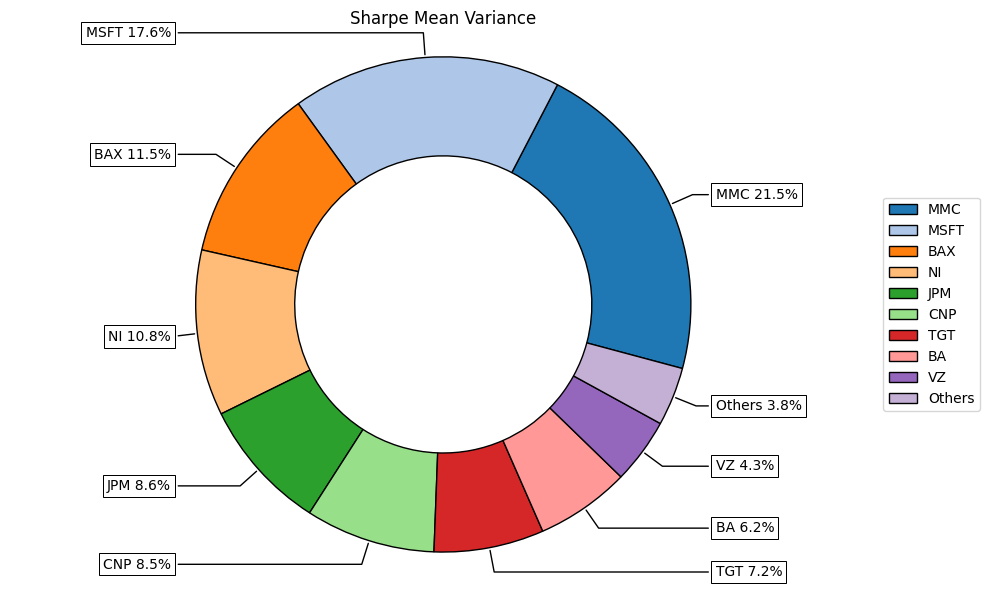

In [14]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [15]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,5.2377%,4.3880%,2.1296%,6.9906%,3.2269%,0.0743%,0.0000%,2.8446%,...,11.4529%,0.0000%,14.9247%,0.1683%,6.5903%,4.0899%,0.0000%,0.0000%,8.2767%,0.0000%
1,0.0000%,2.0125%,8.4905%,0.7979%,1.6844%,8.5602%,2.1529%,1.3612%,0.0000%,1.0443%,...,13.4497%,0.0000%,9.2098%,0.0000%,5.5817%,5.5235%,0.0000%,0.0000%,8.7591%,0.0000%
2,0.0000%,2.8165%,9.3711%,0.0000%,1.1978%,9.1477%,1.7064%,1.7394%,0.0000%,0.0881%,...,14.2328%,0.0000%,6.4846%,0.0000%,5.1002%,6.0539%,0.0000%,0.0000%,9.0041%,0.0000%
3,0.0000%,3.4306%,9.9329%,0.0000%,0.5693%,9.5579%,1.0811%,1.9316%,0.0000%,0.0000%,...,14.7708%,0.0000%,3.6631%,0.0000%,4.2578%,6.4249%,0.0000%,0.0000%,9.2132%,0.0000%
4,0.0000%,3.9343%,10.3865%,0.0000%,0.0004%,9.8875%,0.3998%,2.0811%,0.0000%,0.0000%,...,15.1319%,0.0000%,1.0859%,0.0000%,3.3463%,6.7109%,0.0000%,0.0000%,9.2764%,0.0000%


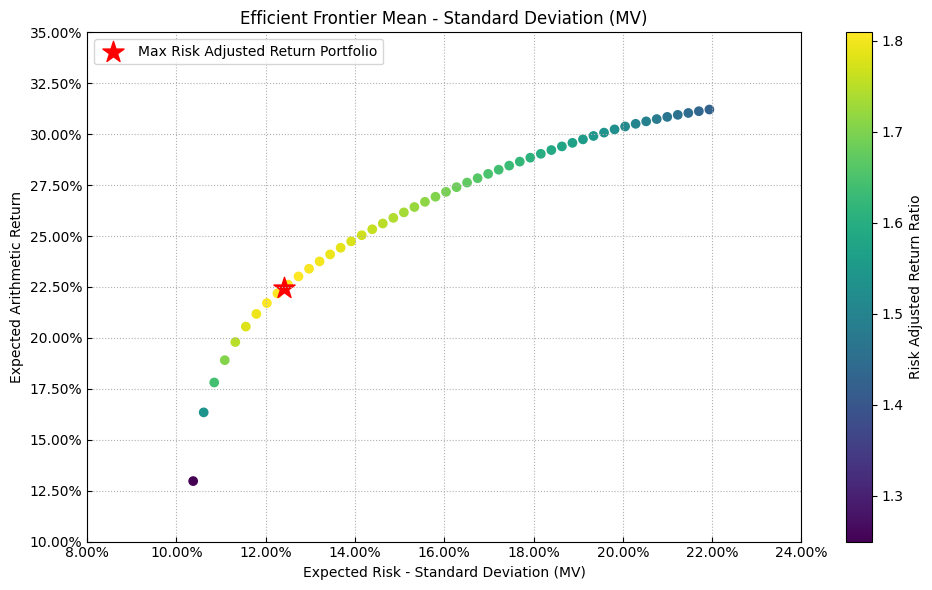

In [16]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

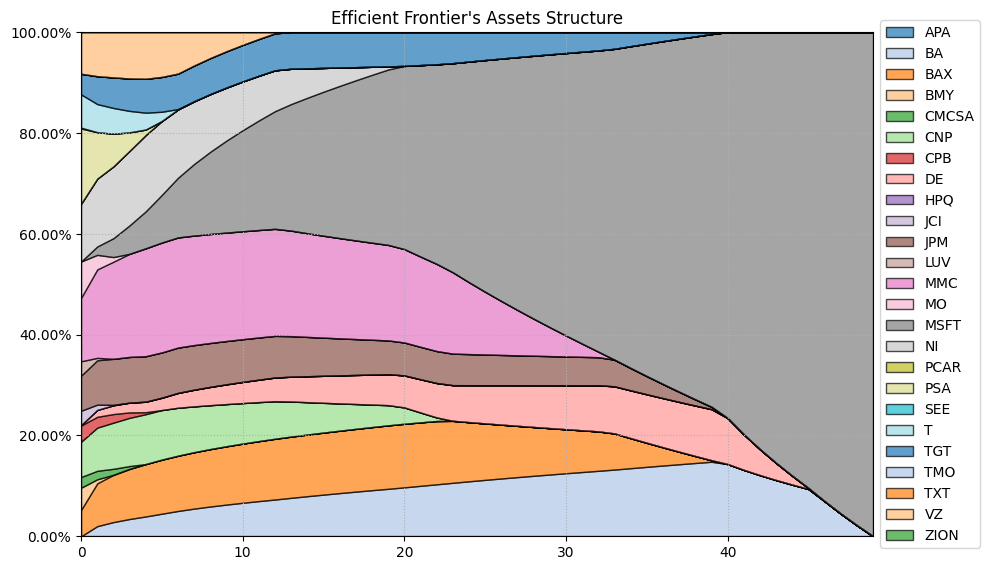

In [17]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)
